# Pymaceuticals Inc.
---

### Introduction

In this summary analysis, we will review the results of Pymaceuticals' treatment testing for squamos cell carcinoma (SCC), and how the high interest drug, Capomulin performs against other, current SCC treatments. 

We studied 249 mice during a 45 day period, maintaining daily data of how each regimen affected the mice. We observed and measured tumor volume development within the provided timeframe.

Pymaceuticals tested a range of ten different treatments
Capomulin
Ketapril
Placebo
Naftisol
Ramicane
Propiva
Ceftamin
Infubinol
Stelasyn
Zoniferol

## Analysis

* The scatter plot shown in the analysis, prortrays a potential association between a mice's weight and size of their tumor, showing that mice of lower wieght finished the regimen with smaller tumors than the heavier mice. There was a very strong positive correlation, with r=0.84.

* The date was further check for any potential outliers, only one outlier was found in Infubinol.

* In looking at the drugs Capomulin and Ramicane, it is seen that these are the most effective drugs for SCC in the study mice.

* It was also observed that if a mouse is given additional days of Capomulin treatment, beyond the 45 days, shrunk the tumor in mouse I509, however, the tumor volume started to go up for other mice, so this may be an inconclusive observation.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = r"/Users/Louie/OneDrive/Desktop/uci/Matplotlib-Challenge/Resources/Mouse_metadata.csv"
study_results_path = r"/Users/Louie/OneDrive/Desktop/uci/Matplotlib-Challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(study_results.columns.tolist())
# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_study_merge

['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_study_merge['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_study_merge.loc[:, ['Mouse ID', 'Timepoint']]

mouse_id_timepoint = mouse_study_merge[mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint'])]
mouse_id_timepoint['Mouse ID'].unique()
#mouse_id_timepoint

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = mouse_study_merge.loc[mouse_study_merge['Mouse ID'] == 'g989']
duplicate_mouse_id['Mouse ID']

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
918    g989
919    g989
920    g989
Name: Mouse ID, dtype: object

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_study_merge['Mouse ID'].duplicated().sum()
mouse_study = mouse_study_merge.loc[mouse_study_merge['Mouse ID'] != 'g989']
#g989_dup = mouse_study_merge.drop_duplicates(subset=['Mouse ID'])
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_study['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.  
drug_reg_mean = mouse_study.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_reg_meadian = mouse_study.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_reg_var = mouse_study.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_reg_sdev = mouse_study.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_reg_sem = mouse_study.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
#try:
    #x = complex(x)
#except ValueError as err:
#    raise(ValueError)(f"Could not convert {x} to numeric") 


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary DataFrame:
summary_statistics = pd.DataFrame({'Tumor Volume Mean' : drug_reg_mean,
                                   'Tumor Volume Meadian' : drug_reg_meadian,
                                   'Tumor Volume Variance' : drug_reg_var,
                                   'Tumor Volume Std. Dev.' : drug_reg_sdev,
                                   'Tumor Volume Std. Err.' : drug_reg_sem
})

summary_statistics


,Tumor Volume Mean,Tumor Volume Meadian,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mouse_study.describe(include=['number'])
mouse_study.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_agg = mouse_study.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std", "sem"])
mouse_study_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

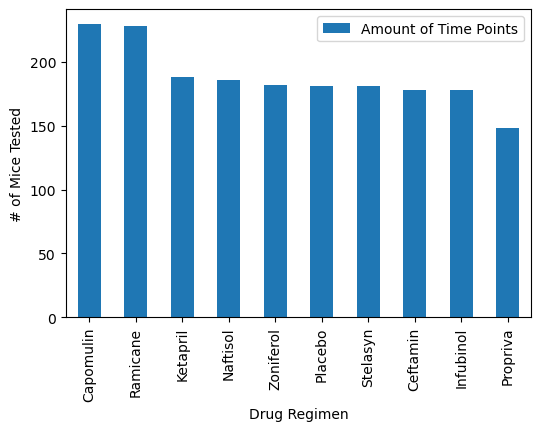

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tpoint_num = mouse_study.groupby(['Drug Regimen'])
stats = pd.DataFrame(tpoint_num['Timepoint'].count())
stats.reset_index()
stats_sort = stats.sort_values(by='Timepoint', ascending=False)
stats_sort
drug_list = list(stats_sort.index.values)
stats_sort.plot(kind='bar', figsize=(6,4))
plt.legend(['Amount of Time Points'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice Tested')
plt.savefig('bar_fig_1.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

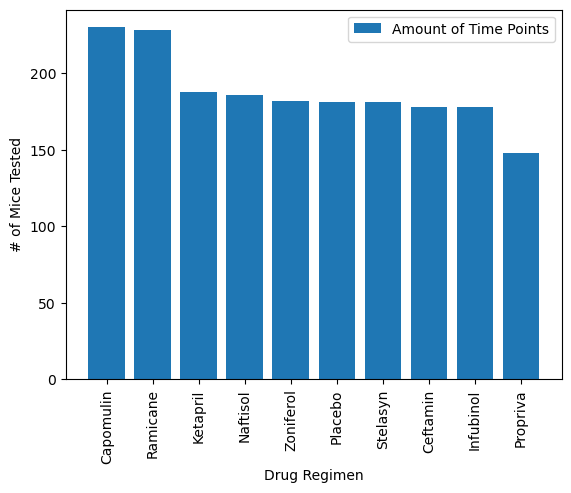

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x=stats_sort.index, height=stats_sort['Timepoint'], 
                                                align='center')

plt.xticks(rotation=90)
plt.legend(['Amount of Time Points'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice Tested')
plt.show


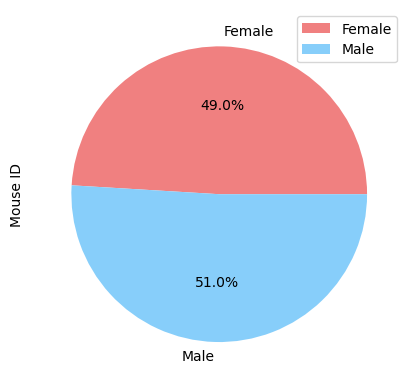

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouse_study.groupby(['Sex'])['Mouse ID']
sex.nunique()
colors = ["lightcoral", "lightskyblue"]
sex = pd.DataFrame(round(sex.count(),2))
sex.plot(kind='pie', subplots=True,colors = colors, autopct="%1.1f%%")
plt.savefig('sex_piechrt.png')
plt.show()


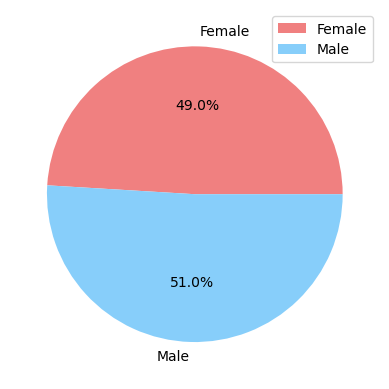

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex.index
sizes = sex['Mouse ID']
colors = ["lightcoral", "lightskyblue"]
plt.pie(sizes, labels=labels, colors = colors, autopct="%1.1f%%")
plt.legend(labels=labels)
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
starting_tmr = mouse_study.groupby(mouse_study['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tmr = pd.merge(mouse_study, starting_tmr, on=['Mouse ID', 'Timepoint'])
final_tmr

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tmr_lst = []

     # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatments:

     tmr_vlm = final_tmr.loc[final_tmr["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    
    # add subset 
     tmr_lst.append(tmr_vlm)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Determine outliers using upper and lower bounds
quartiles = tmr_vlm.quantile([.25,.5,.75])
lwrq = quartiles[0.25]
upprq = quartiles[0.75]
iqr = upprq-lwrq
lwr_bound = lwrq - (1.5*iqr)
uppr_bound = upprq + (1.5*iqr)
outliers = tmr_vlm.loc[(tmr_vlm < lwr_bound) | (tmr_vlm > uppr_bound)]
print(f"Outliers for {regimen} : {outliers}")

Outliers for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)


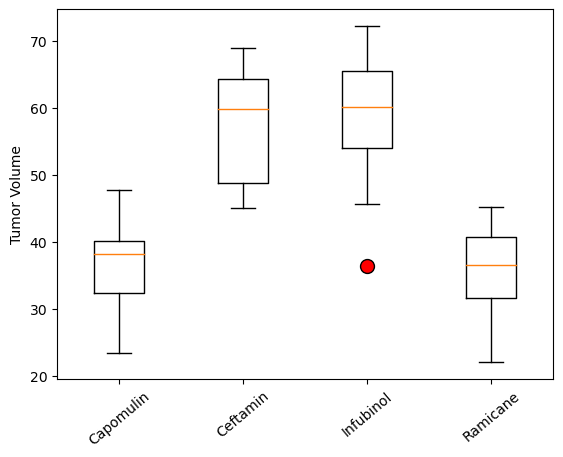

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bxplt_dict = dict(markerfacecolor='red',markersize=10)
plt.boxplot(tmr_lst, labels = treatments, flierprops=bxplt_dict,widths=(.4))
plt.xticks(rotation = 40)
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

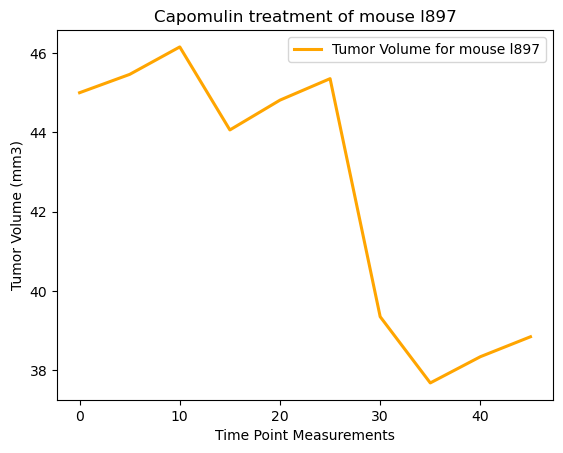

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmln_df = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
random_mouse = capmln_df.sample(n = 1)['Mouse ID']
random_id = random_mouse.iloc[0]
one_mouse = mouse_study.loc[mouse_study['Mouse ID'] == random_id][['Timepoint', 'Tumor Volume (mm3)']]
one_mouse = one_mouse.set_index(['Timepoint'])
plt.plot(one_mouse, color='orange', label='Tumor Volume per Timepoint', linewidth=2.2)
plt.legend([f'Tumor Volume for mouse {random_id}'], loc='best')
plt.title(f'Capomulin treatment of mouse {random_id}')
plt.xlabel(f'Time Point Measurements')
plt.ylabel(f'Tumor Volume (mm3)')
plt.show()



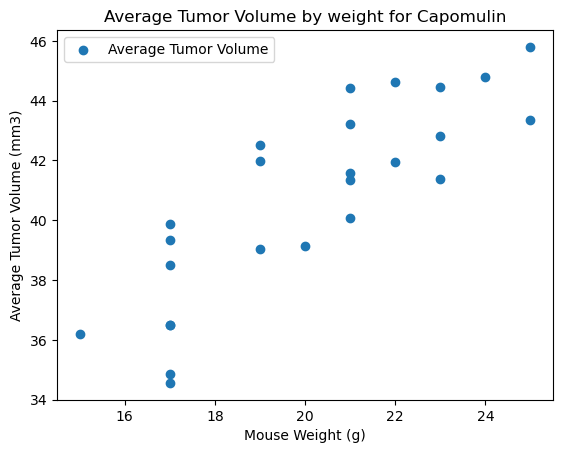

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_wt_capomulin = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
avg_tumor_capomulin = mouse_wt_capomulin.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_capomulin['Weight (g)'], avg_tumor_capomulin['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume by weight for Capomulin')
plt.legend(['Average Tumor Volume'], loc='upper left')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

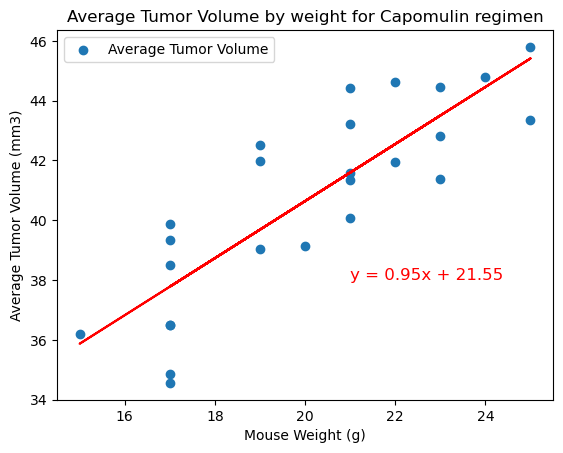

The correlation between mouse weight and the average tumor volume is 0.84


In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, inter, rvalue, pvalue, stderr = st.linregress(avg_tumor_capomulin['Weight (g)'], avg_tumor_capomulin['Tumor Volume (mm3)'])
regress_values = avg_tumor_capomulin['Weight (g)'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(avg_tumor_capomulin['Weight (g)'], avg_tumor_capomulin['Tumor Volume (mm3)'])
plt.plot(avg_tumor_capomulin['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq, (21, 38), fontsize=12, color="red")
plt.title('Average Tumor Volume by weight for Capomulin regimen')
plt.legend(['Average Tumor Volume'], loc='upper left')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatter_reg.png')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')